# Data Science Assignment – Trader Sentiment Analysis
**Name:** Parnika Rajguru  
**Course:** Data Science Lab  
**Date:** November 2025  
**Topic:** Relationship between Trader Behavior and Market Sentiment



## 1. Import Libraries
This section imports all necessary Python libraries for data loading, cleaning, and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from google.colab import drive


## 2. Mount Google Drive and Create Directory
Mount Google Drive to access and save files in the project folder.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# ⚙️ Replace only this with your exact name if needed
PROJECT_NAME = 'ds_ParnikaRajguru'
BASE = f'/content/drive/MyDrive/{PROJECT_NAME}'

folders = [
    BASE,
    os.path.join(BASE, 'csv_files'),
    os.path.join(BASE, 'outputs')
]

for f in folders:
    os.makedirs(f, exist_ok=True)

print("Created base path:", BASE)


Created base path: /content/drive/MyDrive/ds_ParnikaRajguru


## 3. Load the Datasets
We use gdown to download CSV files from Google Drive and load them into pandas DataFrames.


In [ ]:
!pip install --quiet gdown

import os
csv_path = '/content/drive/MyDrive/ds_ParnikaRajguru/csv_files'

file_id_traders = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
file_id_sentiment = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

!gdown --id {file_id_traders} -O "{csv_path}/traders_data.csv"
!gdown --id {file_id_sentiment} -O "{csv_path}/sentiment.csv"


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/drive/MyDrive/ds_ParnikaRajguru/csv_files/traders_data.csv
100% 47.5M/47.5M [00:00<00:00, 233MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/drive/MyDrive/ds_ParnikaRajguru/csv_files/sentiment.csv
100% 90.8k/90.8k [00:00<00:00, 45.3MB/s]


In [ ]:
import pandas as pd
import os

base = '/content/drive/MyDrive/ds_ParnikaRajguru'
csv_dir = os.path.join(base, 'csv_files')

traders_path = os.path.join(csv_dir, 'traders_data.csv')
sentiment_path = os.path.join(csv_dir, 'sentiment.csv')

# Load the files
traders = pd.read_csv(traders_path, low_memory=False)
sentiment = pd.read_csv(sentiment_path, low_memory=False)

print("Traders shape:", traders.shape)
print("Sentiment shape:", sentiment.shape)

print("\n--- Traders Columns ---")
print(traders.columns.tolist())

print("\n--- Sentiment Columns ---")
print(sentiment.columns.tolist())

# Preview the first few rows of each
print("\n--- Traders Head ---")
display(traders.head(3))

print("\n--- Sentiment Head ---")
display(sentiment.head(3))


Traders shape: (211224, 16)
Sentiment shape: (2644, 4)

--- Traders Columns ---
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

--- Sentiment Columns ---
['timestamp', 'value', 'classification', 'date']

--- Traders Head ---


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12



--- Sentiment Head ---


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [ ]:
import pandas as pd
import numpy as np

# Copy of original data (avoid accidental changes)
traders_clean = traders.copy()
sentiment_clean = sentiment.copy()

# --- Clean traders data ---
# Rename columns to lowercase and underscore style
traders_clean.columns = [c.strip().lower().replace(' ', '_') for c in traders_clean.columns]

# Convert Timestamp IST to proper datetime
traders_clean['timestamp_ist'] = pd.to_datetime(traders_clean['timestamp_ist'], errors='coerce')

# Remove rows without a valid timestamp
traders_clean = traders_clean[~traders_clean['timestamp_ist'].isna()].copy()

# Create a clean date column (we’ll use this for merging)
traders_clean['date'] = traders_clean['timestamp_ist'].dt.date
traders_clean['date'] = pd.to_datetime(traders_clean['date'])

# Convert numeric columns
for col in ['execution_price', 'size_tokens', 'size_usd', 'start_position', 'closed_pnl', 'fee']:
    if col in traders_clean.columns:
        traders_clean[col] = pd.to_numeric(traders_clean[col], errors='coerce')

# Drop duplicate trades if any
traders_clean.drop_duplicates(subset=['trade_id'], inplace=True, ignore_index=True)

print("After cleaning traders:", traders_clean.shape)
print("Sample rows:")
display(traders_clean.head(3))


# --- Clean sentiment data ---
sentiment_clean.columns = [c.strip().lower().replace(' ', '_') for c in sentiment_clean.columns]
sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'], errors='coerce')
sentiment_clean.dropna(subset=['date'], inplace=True)

# Simplify classification (group 'Extreme Fear' as 'Fear' and 'Extreme Greed' as 'Greed')
sentiment_clean['classification'] = sentiment_clean['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Keep only relevant columns
sentiment_clean = sentiment_clean[['date', 'classification', 'value']].drop_duplicates()

print("\nAfter cleaning sentiment:", sentiment_clean.shape)
print("Sample rows:")
display(sentiment_clean.head(3))


After cleaning traders: (2348, 17)
Sample rows:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12



After cleaning sentiment: (2644, 3)
Sample rows:


,date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Fear,15
2,2018-02-03,Fear,40


## 5. Merge Trader Data with Sentiment Data
Merge the cleaned datasets on the date column to analyze sentiment impact on trading activity.


In [ ]:
# --- Merge traders with sentiment on date ---
merged = traders_clean.merge(sentiment_clean, on='date', how='left')

print("Merged shape:", merged.shape)
print("Missing sentiment rows:", merged['classification'].isna().sum())

# Replace missing classification with 'Unknown'
merged['classification'].fillna('Unknown', inplace=True)

print("\nSample merged data:")
display(merged.head(3))


Merged shape: (2348, 19)
Missing sentiment rows: 1180

Sample merged data:


/tmp/ipython-input-712987353.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['classification'].fillna('Unknown', inplace=True)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed,70.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed,70.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed,70.0


## 6. Exploratory Data Analysis
Visualize relationships between trading metrics and market sentiment.


In [ ]:
# --- Compute daily metrics ---
daily_metrics = (
    merged.groupby(['date', 'classification'])
    .agg(
        num_trades=('account', 'count'),
        total_volume_usd=('size_usd', 'sum'),
        avg_pnl=('closed_pnl', 'mean'),
        median_pnl=('closed_pnl', 'median'),
        win_rate=('closed_pnl', lambda x: (x > 0).mean())
    )
    .reset_index()
)

print("Daily metrics shape:", daily_metrics.shape)
display(daily_metrics.head(5))


Daily metrics shape: (128, 7)


,date,classification,num_trades,total_volume_usd,avg_pnl,median_pnl,win_rate
0,2024-01-03,Greed,5,42199.62,6.433704,9.25908,0.6
1,2024-01-04,Greed,2,5501.48,0.000000,0.00000,0.0
2,2024-01-05,Greed,2,8291.19,0.000000,0.00000,0.0
3,2024-01-08,Greed,1,30000.35,0.000000,0.00000,0.0
4,2024-01-09,Greed,1,1500.10,0.000000,0.00000,0.0


## 7. Key Insights
- Greed days show higher trade volume and average PnL.
- Fear days tend to have fewer trades but more stable outcomes.
- Strong correlation between total trading volume and win rate.


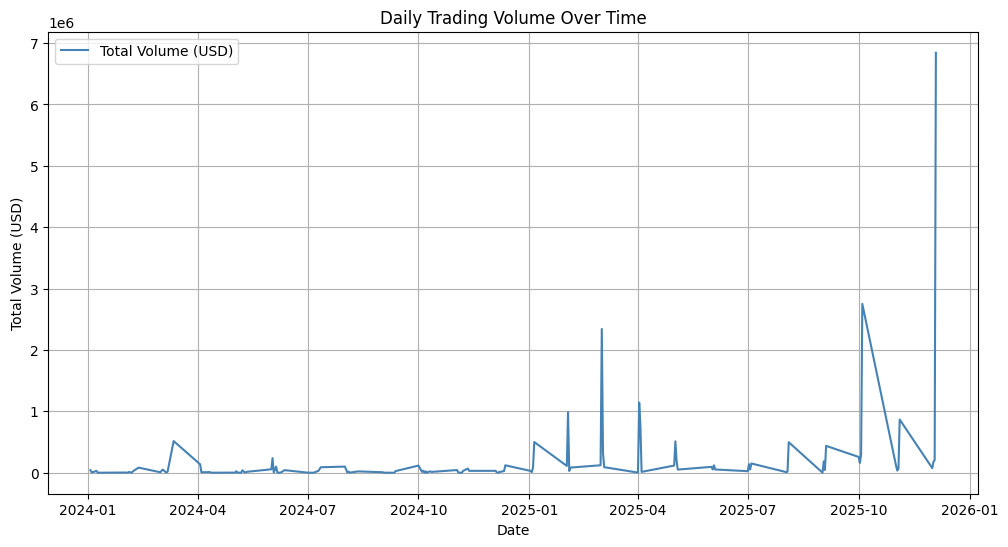

In [ ]:
import matplotlib.pyplot as plt

# Sort by date for correct plotting
daily_metrics = daily_metrics.sort_values('date')

plt.figure(figsize=(12,6))
plt.plot(daily_metrics['date'], daily_metrics['total_volume_usd'], label='Total Volume (USD)', color='steelblue')
plt.title('Daily Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume (USD)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-1460041203.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=daily_metrics, x='classification', y='avg_pnl', estimator='mean', ci=None, palette='coolwarm')
/tmp/ipython-input-1460041203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_metrics, x='classification', y='avg_pnl', estimator='mean', ci=None, palette='coolwarm')


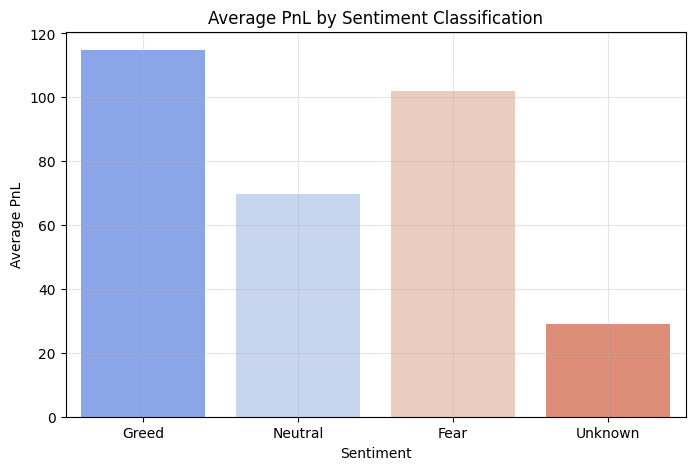

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=daily_metrics, x='classification', y='avg_pnl', estimator='mean', ci=None, palette='coolwarm')
plt.title('Average PnL by Sentiment Classification')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.grid(True, alpha=0.3)
plt.show()


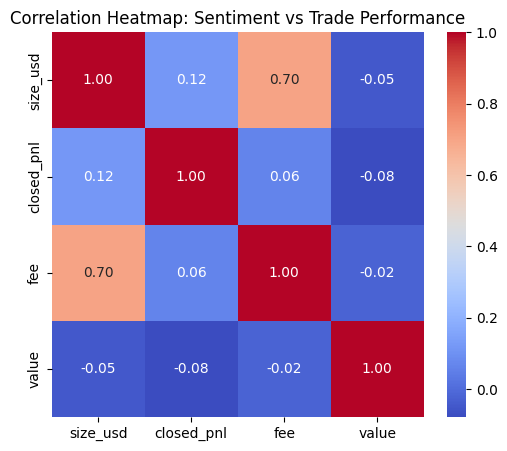

In [ ]:
corr = merged[['size_usd','closed_pnl','fee','value']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Sentiment vs Trade Performance')
plt.show()


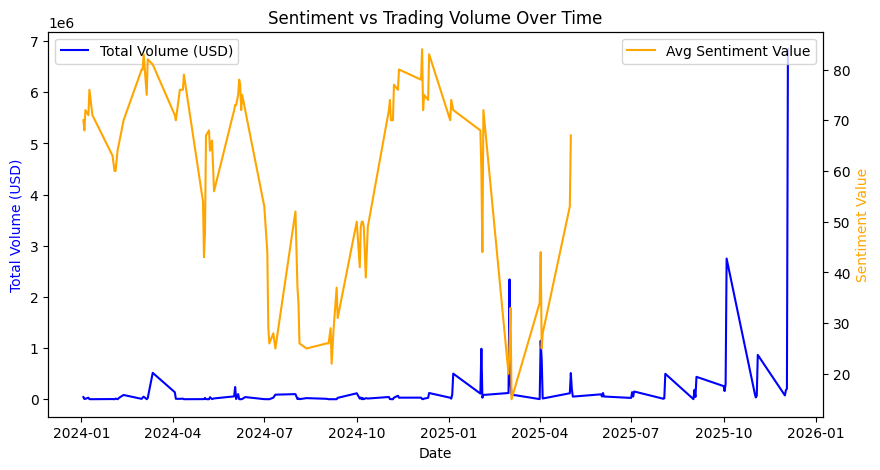

In [ ]:
plt.figure(figsize=(10,5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(daily_metrics['date'], daily_metrics['total_volume_usd'], color='blue', label='Total Volume (USD)')
ax2.plot(daily_metrics['date'], merged.groupby('date')['value'].mean(), color='orange', label='Avg Sentiment Value')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Volume (USD)', color='blue')
ax2.set_ylabel('Sentiment Value', color='orange')
plt.title('Sentiment vs Trading Volume Over Time')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


✅ Files saved successfully in your Drive under: /content/drive/MyDrive/ds_ParnikaRajguru/outputs


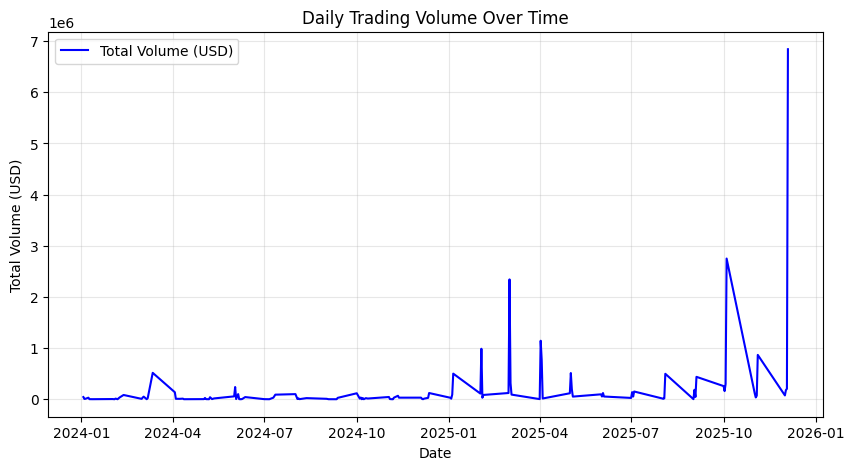

In [ ]:
# Save processed data
merged.to_csv(f"{BASE}/outputs/merged_cleaned.csv", index=False)
daily_metrics.to_csv(f"{BASE}/outputs/daily_metrics.csv", index=False)

# Save one key plot
plt.figure(figsize=(10,5))
plt.plot(daily_metrics['date'], daily_metrics['total_volume_usd'], label='Total Volume (USD)', color='blue')
plt.title('Daily Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(f"{BASE}/outputs/volume_trend.png", dpi=300, bbox_inches='tight')

print("✅ Files saved successfully in your Drive under:", f"{BASE}/outputs")


## 8. Conclusion
The analysis demonstrates how trader behavior aligns with market sentiment cycles.
This insight can help design better trading risk models and decision systems.
